**Lets works with smokers dataset first and get analysis**

In [ ]:
import pandas as pd


In [ ]:
smokers = pd.read_csv('/content/smokers.csv')

In [ ]:
smokers.head(8)

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27
5,1984,Unweighted,NaN,34,35,38,37,39,26
6,1986,Unweighted,NaN,33,35,36,36,35,25
7,1988,Unweighted,NaN,32,33,36,36,33,23


In [ ]:
smokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB


In [ ]:
smokers.describe()


,Year,16 and Over,16-24,25-34,35-49,50-59,60 and Over
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1997.250000,27.892857,31.345238,33.678571,31.285714,28.952381,18.750000
std,12.142601,7.525087,5.954636,7.287819,8.161873,9.376855,7.441134
min,1974.000000,17.000000,20.000000,20.000000,20.000000,18.000000,10.000000
25%,1987.500000,22.000000,26.000000,28.000000,25.000000,22.000000,13.000000
50%,2000.500000,27.000000,33.000000,34.000000,29.500000,26.000000,16.000000
75%,2007.250000,32.000000,35.000000,37.000000,36.000000,34.250000,23.000000
max,2014.000000,51.000000,47.000000,55.000000,55.000000,53.000000,44.000000


In [ ]:
smokers.isnull().sum()

,0
Year,0
Method,0
Sex,28
16 and Over,0
16-24,0
25-34,0
35-49,0
50-59,0
60 and Over,0


In [ ]:
smokers['Method'].unique()
smokers['Sex'].unique()

array([nan, 'Male', 'Female'], dtype=object)

In [ ]:
missing_sex = smokers[smokers['Sex'].isnull()]
missing_sex.head(10)

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27
5,1984,Unweighted,NaN,34,35,38,37,39,26
6,1986,Unweighted,NaN,33,35,36,36,35,25
7,1988,Unweighted,NaN,32,33,36,36,33,23
8,1990,Unweighted,NaN,30,35,35,33,29,21
9,1992,Unweighted,NaN,28,33,34,31,29,20


In [ ]:
# Handling missing values in Sex column
# replcing missing values with All

smokers['Sex'] = smokers['Sex'].fillna('All')



In [ ]:
smokers['Sex'].unique()

array(['All', 'Male', 'Female'], dtype=object)

In [ ]:
smokers['Sex'].isnull().sum()

np.int64(0)

In [ ]:
# check numeric columns for missing or strange values

smokers[['16 and Over','16-24','25-34','35-49','50-59','60 and Over']].isnull().sum()

,0
16 and Over,0
16-24,0
25-34,0
35-49,0
50-59,0
60 and Over,0


In [ ]:
smokers[['16 and Over','16-24','25-34','35-49','50-59','60 and Over']].describe()

,16 and Over,16-24,25-34,35-49,50-59,60 and Over
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,27.892857,31.345238,33.678571,31.285714,28.952381,18.750000
std,7.525087,5.954636,7.287819,8.161873,9.376855,7.441134
min,17.000000,20.000000,20.000000,20.000000,18.000000,10.000000
25%,22.000000,26.000000,28.000000,25.000000,22.000000,13.000000
50%,27.000000,33.000000,34.000000,29.500000,26.000000,16.000000
75%,32.000000,35.000000,37.000000,36.000000,34.250000,23.000000
max,51.000000,47.000000,55.000000,55.000000,53.000000,44.000000


***Visualize Smoking Trends Over Time***

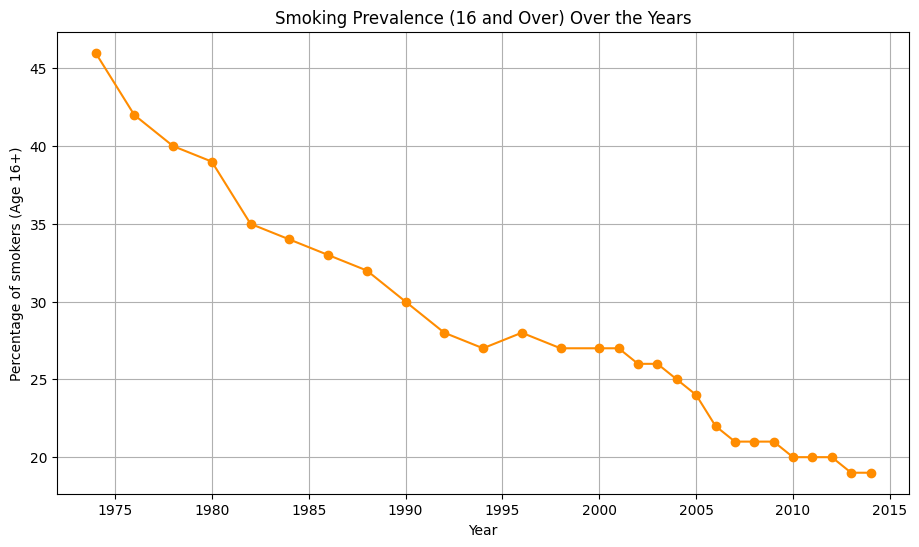

In [ ]:
import matplotlib.pyplot as plt

# filter rows where Sex is 'All' (to avoid double lines for male/female)
overall = smokers[smokers['Sex'] == 'All']

plt.figure(figsize = (11,6))
plt.plot(overall['Year'], overall['16 and Over'], color = 'darkorange', marker = 'o')
plt.title('Smoking Prevalence (16 and Over) Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of smokers (Age 16+)')
plt.grid(True)
plt.show()



**Observation:**

Smoking rates dropped steadily from around 45 in 1974 to about 19 in 2015.

This means fewer and fewer people smoked over time — likely due to health awareness, bans on tobacco ads, higher taxes, and smoking restrictions.

it shows a strong downward trend in smoking prevalence.


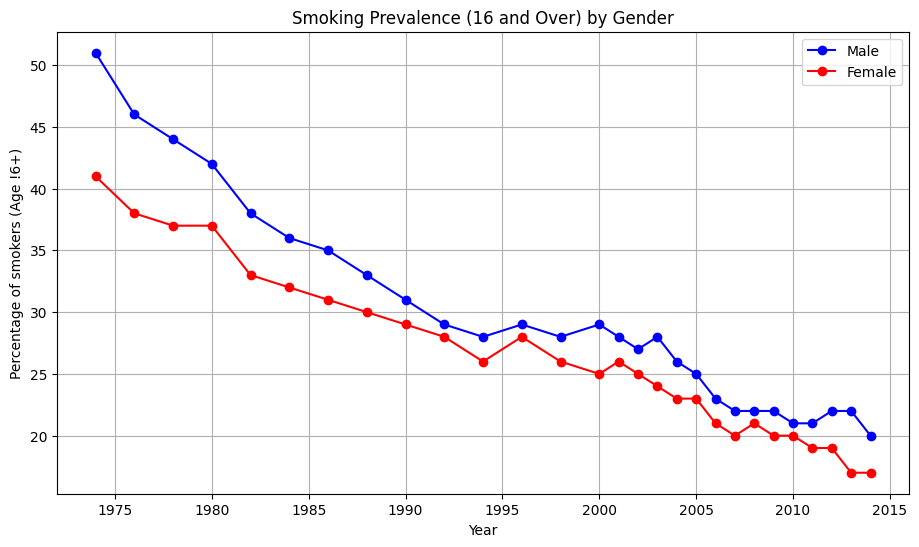

In [ ]:
plt.figure(figsize = (11,6))

# male
male = smokers[smokers['Sex'] == 'Male']
plt.plot(male['Year'], male['16 and Over'], color = 'blue', marker = 'o', label = 'Male')

# female
female = smokers[smokers['Sex'] == 'Female']
plt.plot(female['Year'], female['16 and Over'], color = 'red', marker = 'o', label = 'Female')

plt.title('Smoking Prevalence (16 and Over) by Gender')
plt.xlabel('Year')
plt.ylabel('Percentage of smokers (Age !6+)')
plt.legend()
plt.grid(True)
plt.show()

## **Observation:**

Both male and female smoking rates are decreasing steadily from 1974 to 2015.

The male line is higher — meaning a higher percentage of men smoked compared to women in every year.

But both lines move down together — suggesting that anti-smoking efforts affected both groups over time.

*imp insight : “Between 1974 and 2015, smoking prevalence decreased consistently for both men and women, though men consistently had higher smoking rates than women.”*

# **Understand and Explore the Admissions dataset**

In [ ]:
admissions = pd.read_csv('/content/admissions.csv')

In [ ]:
admissions.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


In [ ]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB


In [ ]:
admissions.describe()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,2079,2079,2079,2079,2079,1386,2078
unique,11,32,32,11,2,2,1420
top,2014/15,All codes,All admissions,Cancers which can be caused by smoking,Number of admissions,Male,.
freq,189,66,66,726,1056,693,40


In [ ]:
admissions.isnull().sum()

,0
Year,0
ICD10 Code,0
ICD10 Diagnosis,0
Diagnosis Type,0
Metric,0
Sex,693
Value,1


In [ ]:
# cleaning admission dataset

# replace missing Sex values with 'All'
admissions['Sex'] = admissions['Sex'].fillna('All')

# convert Value column to numeric (some are text)
admissions['Value'] = pd.to_numeric(admissions['Value'], errors = 'coerce')

# extract the first 4 characters of 'Year' (e.g., '2014' from '2014/15')
admissions['Year'] = admissions['Year'].astype(str).str[:4].astype(int)

# drop rows where Value is missing (only 1 row)
admissions = admissions.dropna(subset = ['Value'])

In [ ]:
admissions['Sex'].unique()

array(['All', 'Male', 'Female'], dtype=object)

In [ ]:
admissions.isnull().sum()

,0
Year,0
ICD10 Code,0
ICD10 Diagnosis,0
Diagnosis Type,0
Metric,0
Sex,0
Value,0


In [ ]:
admissions.dtypes.head(10)

,0
Year,int64
ICD10 Code,object
ICD10 Diagnosis,object
Diagnosis Type,object
Metric,object
Sex,object
Value,float64


# **Visualization : visualize smoking-related hospital admissions over time**

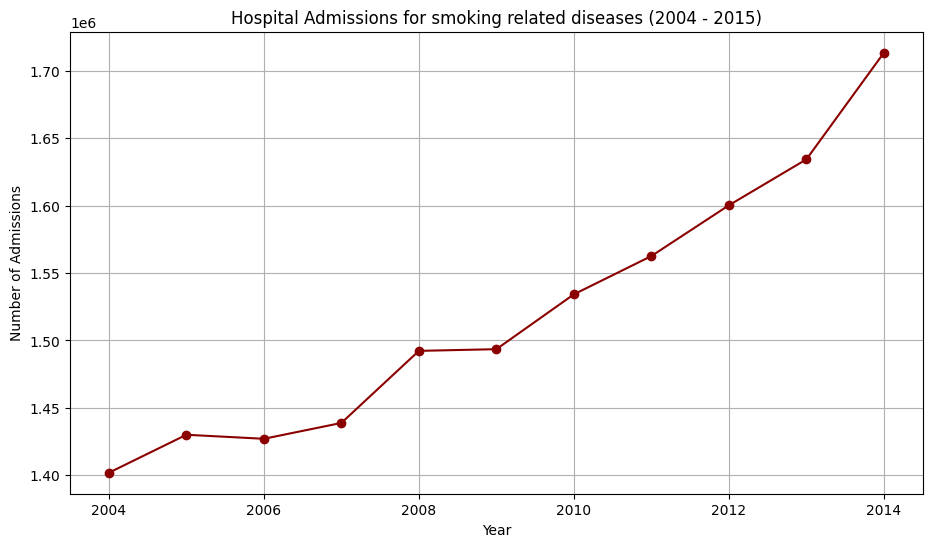

In [ ]:
import matplotlib.pyplot as plt

# filter data for diseases caused by smoking (and Sex = All)
smoking_admissions = admissions[
    (admissions['ICD10 Diagnosis'] == 'All diseases which can be caused by smoking') &
    (admissions['Sex'] == 'All')
]

# sort by year just to make sure
smoking_admissions = smoking_admissions.sort_values('Year')

# plot

plt.figure(figsize = (11,6))
plt.plot(smoking_admissions['Year'],smoking_admissions['Value'], color = 'darkred', marker = 'o')
plt.title('Hospital Admissions for smoking related diseases (2004 - 2015)')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

**Observation:**

“Despite a steady decline in smoking rates, smoking-related hospital admissions increased, possibly due to long-term health effects and improved diagnosis.”

# Compare smokers vs. hospital admissions

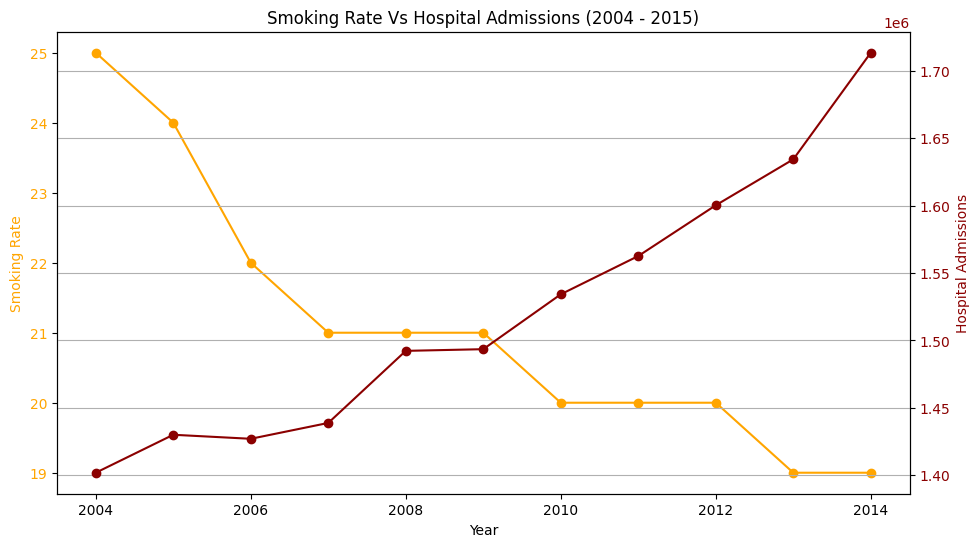

In [ ]:
# smokers data (only overall/all)
smokers_all = smokers[smokers['Sex'] == 'All'][['Year','16 and Over']]

# admission data (smoking-related, all sexes)
admissions_all = admissions[
    (admissions['ICD10 Diagnosis'] == 'All diseases which can be caused by smoking') &
    (admissions['Sex'] == 'All')
][['Year' , 'Value']]

# rename columns for clarity
smokers_all.rename(columns = {'16 and Over' : 'Smoking_Rate'}, inplace = True)
admissions_all.rename(columns = {'Value': 'Admissions'}, inplace = True)

# merge both on Year
combined = pd.merge(smokers_all, admissions_all, on = 'Year', how = 'inner')

# visualize comparison
fig, ax1 = plt.subplots(figsize = (11,6))

# left y-axis (smoking Age)
ax1.plot(combined['Year'], combined['Smoking_Rate'], color = 'orange', marker = 'o', label = 'Smoking Age')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoking Rate', color = 'orange')
ax1.tick_params('y', labelcolor = 'orange')

# right y-axis (admissions)
ax2 = ax1.twinx()                 # ax1.twinx() → adds a second y-axis on the right
ax2.plot(combined['Year'],combined['Admissions'], color = 'darkred', marker = 'o', label = 'Hospital Admission')
ax2.set_ylabel('Hospital Admissions', color = 'darkred')
ax2.tick_params('y', labelcolor = 'darkred')

plt.title('Smoking Rate Vs Hospital Admissions (2004 - 2015)')
plt.grid(True)
plt.show()

**Observations:**

“From 2004 to 2015, the overall smoking rate in England declined steadily, while hospital admissions for smoking-related illnesses increased by roughly 20%. This indicates that public health impacts persist even as tobacco use decreases.”

In [ ]:
# lets find correlation between hospital admission and smoking age

correlation = combined['Smoking_Rate'].corr(combined['Admissions'])

print('correlation betweeen smoking age and hospital admission :')
print(round(correlation,3))

correlation betweeen smoking age and hospital admission :
-0.837


**Observation**

Between 2004 and 2015, there is a strong negative correlation (-0.837) between smoking prevalence and hospital admissions for smoking-related diseases.
This indicates that even though fewer people are smoking, the number of hospital admissions continues to rise.
The likely reason is the long-term health effects of tobacco, where diseases appear years after smoking habits began.

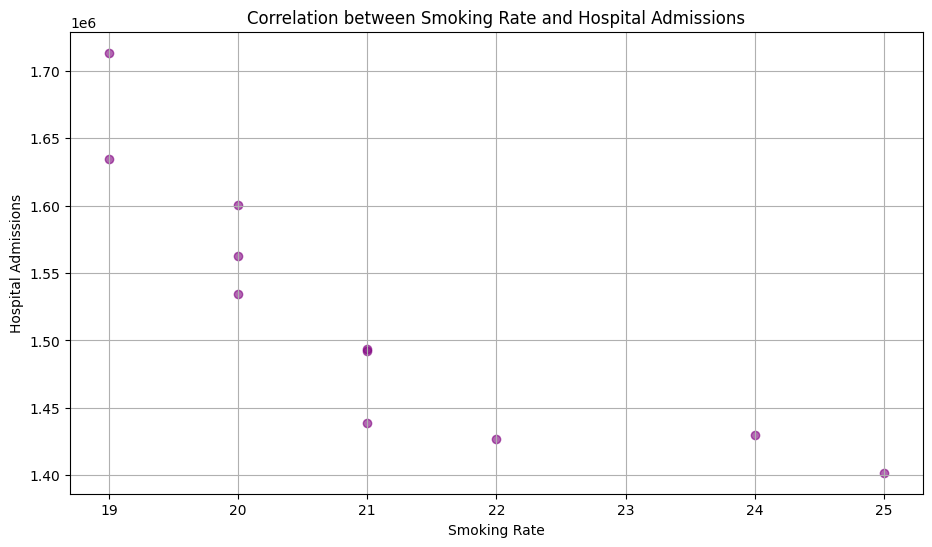

In [ ]:
# visualise correlation
plt.figure(figsize = (11,6))

plt.scatter(combined['Smoking_Rate'],combined['Admissions'], color = 'purple', alpha = 0.6)
plt.title('Correlation between Smoking Rate and Hospital Admissions')
plt.xlabel('Smoking Rate')
plt.ylabel('Hospital Admissions')
plt.grid(True)
plt.show()

**Observation:**

The scatter plot between smoking prevalence and hospital admissions shows a strong negative correlation (r = -0.837). This means that although fewer people are smoking over the years, hospital admissions related to smoking have increased. This can be attributed to the long-term health effects of tobacco use, which often manifest years after smoking behavior begins.

# **Explore and clean the fatalities dataset**

In [ ]:
import pandas as pd

fatalities = pd.read_csv('/content/fatalities.csv')

In [ ]:
fatalities.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101


In [ ]:
fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1749 non-null   int64 
 1   ICD10 Code       1749 non-null   object
 2   ICD10 Diagnosis  1749 non-null   object
 3   Diagnosis Type   1749 non-null   object
 4   Metric           1749 non-null   object
 5   Sex              1166 non-null   object
 6   Value            1749 non-null   object
dtypes: int64(1), object(6)
memory usage: 95.8+ KB


In [ ]:
fatalities.isnull().sum()

,0
Year,0
ICD10 Code,0
ICD10 Diagnosis,0
Diagnosis Type,0
Metric,0
Sex,583
Value,0


In [ ]:
fatalities.columns.tolist()

['Year',
 'ICD10 Code',
 'ICD10 Diagnosis',
 'Diagnosis Type',
 'Metric',
 'Sex',
 'Value']

In [ ]:
# clean fatalities dataset
# replacing 'null' values with 'All'
fatalities['Sex'] = fatalities['Sex'].fillna('All')

# converting value columns from object -> numeric
fatalities['Value'] = pd.to_numeric(fatalities['Value'], errors = 'coerce')




In [ ]:
fatalities['Sex'].unique()

array(['All', 'Male', 'Female'], dtype=object)

In [ ]:
fatalities.isnull().sum()

,0
Year,0
ICD10 Code,0
ICD10 Diagnosis,0
Diagnosis Type,0
Metric,0
Sex,0
Value,20


In [ ]:
# drop null values of value column

fatalities = fatalities.dropna(subset = ['Value'])

In [ ]:
fatalities.isnull().sum()

,0
Year,0
ICD10 Code,0
ICD10 Diagnosis,0
Diagnosis Type,0
Metric,0
Sex,0
Value,0


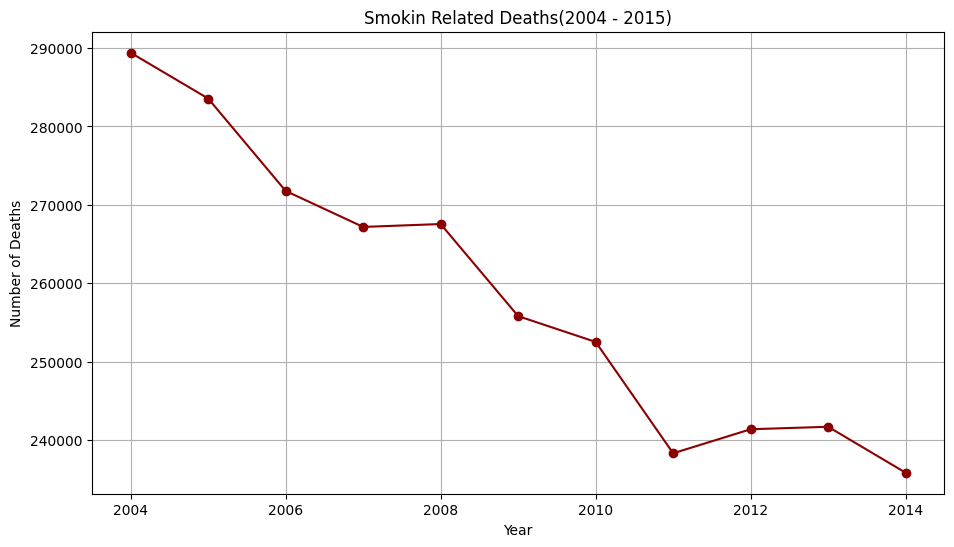

In [ ]:
# lets now visualise

# filter data for smoking-related deaths (all sexes)
smoking_deaths = fatalities[
    (fatalities['ICD10 Diagnosis'] == 'All deaths which can be caused by smoking') &
    (fatalities['Sex'] == 'All')
]

# sort by year to make sure the line goes in order
smoking_deaths = smoking_deaths.sort_values('Year')

# creation of line plot
plt.figure(figsize = (11,6))
plt.plot(smoking_deaths['Year'],smoking_deaths['Value'], color = 'darkred', marker ='o')
plt.title('Smokin Related Deaths(2004 - 2015)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

# **observation:**

Between 2004 and 2015, smoking-related deaths showed a clear decline, falling from around 290,000 to nearly 235,000. This trend suggests that healthcare improvements and early treatment may have reduced mortality, even as smoking-related hospital admissions increased.

In [ ]:
# Now let’s connect  smokers dataset (smoking age) with the fatalities dataset (deaths) to see how they relate, just like we did earlier with hospital admissions.

# prepare smokers data (overall Age)
smokers_all = smokers[smokers['Sex'] == 'All'][['Year','16 and Over']]
smokers_all.rename(columns = {'16 and Over' : 'Smoking_Rate'}, inplace = True)

# prepare deaths data (smoking-related deaths, all sexes)
deaths_all = fatalities[
    (fatalities['ICD10 Diagnosis'] == 'All deaths which can be caused by smoking') &
    (fatalities['Sex'] == 'All')
][['Year','Value']]
deaths_all.rename(columns = {'Value' : 'Deaths'}, inplace = True)

# Merge by Year
combined_deaths = pd.merge(smokers_all, deaths_all, on = 'Year', how = 'inner')

In [ ]:
combined_deaths.head()

,Year,Smoking_Rate,Deaths
0,2004,25,289408.0
1,2005,24,283565.0
2,2006,22,271775.0
3,2007,21,267180.0
4,2008,21,267551.0


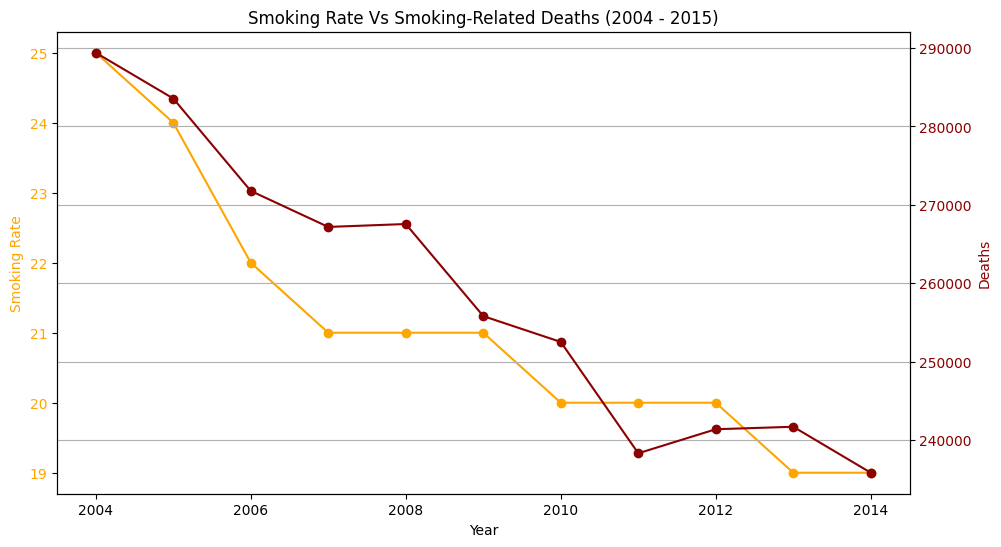

In [ ]:
# plot comparisons

fig, ax1 = plt.subplots(figsize = (11,6))

# Smoking Age (left y-axis)
ax1.plot(combined_deaths['Year'],combined_deaths['Smoking_Rate'], color = 'orange', marker = 'o', label = 'Smoking Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoking Rate', color = 'orange')
ax1.tick_params(axis = 'y', labelcolor = 'orange')

# Deaths (right y-axis)
ax2 = ax1.twinx()
ax2.plot(combined_deaths['Year'],combined_deaths['Deaths'],color = 'darkred', marker = 'o', label = 'Smoking-Related Deaths')
ax2.set_ylabel('Deaths', color = 'darkred')
ax2.tick_params(axis = 'y', labelcolor = 'darkred')


plt.title('Smoking Rate Vs Smoking-Related Deaths (2004 - 2015)')
plt.grid(True)
plt.show()

**Observation:**

From 2004 to 2015, both smoking prevalence and smoking-related deaths showed a consistent downward trend. This indicates a positive correlation between reduced smoking and reduced mortality. The data suggests that public health measures and awareness campaigns to reduce smoking have likely contributed to lower mortality rates.

In [ ]:
# checking correlation

correlation_deaths = combined_deaths['Smoking_Rate'].corr(combined_deaths['Deaths'])

correlation_deaths

np.float64(0.9356070567584677)

**The correlation between smoking rates and smoking-related deaths during 2004–2015 was +0.94, indicating a very strong positive relationship. This suggests that as fewer people smoked, the number of deaths caused by smoking declined proportionally. The trend highlights the effectiveness of public health interventions aimed at reducing tobacco use.**

# **analyzing the prescriptions dataset**

In [ ]:
prescriptions = pd.read_csv('/content/prescriptions.csv')

In [ ]:
prescriptions.head()

,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0


In [ ]:
prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         11 non-null     object 
 1   All Pharmacotherapy Prescriptions                            11 non-null     int64  
 2   Nicotine Replacement Therapy (NRT) Prescriptions             11 non-null     int64  
 3   Bupropion (Zyban) Prescriptions                              11 non-null     int64  
 4   Varenicline (Champix) Prescriptions                          9 non-null      float64
 5   Net Ingredient Cost of All Pharmacotherapies                 11 non-null     int64  
 6   Net Ingredient Cost of Nicotine Replacement Therapies (NRT)  11 non-null     int64  
 7   Net Ingredient Cost of Bupropion (Zyban)                     11 non-null     int64 

In [ ]:
prescriptions.isnull().sum()

,0
Year,0
All Pharmacotherapy Prescriptions,0
Nicotine Replacement Therapy (NRT) Prescriptions,0
Bupropion (Zyban) Prescriptions,0
Varenicline (Champix) Prescriptions,2
Net Ingredient Cost of All Pharmacotherapies,0
Net Ingredient Cost of Nicotine Replacement Therapies (NRT),0
Net Ingredient Cost of Bupropion (Zyban),0
Net Ingredient Cost of Varenicline (Champix),2


**Clean prescriptions dataset**

In [ ]:
# fill missing values (use previous year's data)
prescriptions['Varenicline (Champix) Prescriptions'] = prescriptions['Varenicline (Champix) Prescriptions'].fillna(method='ffill')
prescriptions['Net Ingredient Cost of Varenicline (Champix)'] = prescriptions['Net Ingredient Cost of Varenicline (Champix)'].fillna(method='ffill')

#  convert Year from '2014/15' → 2015 (just the last 4 digits)
prescriptions['Year'] = prescriptions['Year'].apply(lambda x: int('20' + x.split('/')[1]))      # x.split("/")[1] → takes the part after the slash, like "15".

/tmp/ipython-input-3564235451.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prescriptions['Varenicline (Champix) Prescriptions'] = prescriptions['Varenicline (Champix) Prescriptions'].fillna(method='ffill')
/tmp/ipython-input-3564235451.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prescriptions['Net Ingredient Cost of Varenicline (Champix)'] = prescriptions['Net Ingredient Cost of Varenicline (Champix)'].fillna(method='ffill')


In [ ]:
prescriptions.isnull().sum()

,0
Year,0
All Pharmacotherapy Prescriptions,0
Nicotine Replacement Therapy (NRT) Prescriptions,0
Bupropion (Zyban) Prescriptions,0
Varenicline (Champix) Prescriptions,0
Net Ingredient Cost of All Pharmacotherapies,0
Net Ingredient Cost of Nicotine Replacement Therapies (NRT),0
Net Ingredient Cost of Bupropion (Zyban),0
Net Ingredient Cost of Varenicline (Champix),0


In [ ]:
prescriptions.dtypes.head()

,0
Year,int64
All Pharmacotherapy Prescriptions,int64
Nicotine Replacement Therapy (NRT) Prescriptions,int64
Bupropion (Zyban) Prescriptions,int64
Varenicline (Champix) Prescriptions,float64


In [ ]:
prescriptions.head()

,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2015,1348,766,21,561.0,38145,18208,807,19129.0
1,2014,1778,1059,22,697.0,48767,24257,865,23646.0
2,2013,2203,1318,26,859.0,58121,28069,994,29058.0
3,2012,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2011,2564,1541,36,987.0,65883,30808,1581,33494.0


**visualize trends in prescriptions over time**

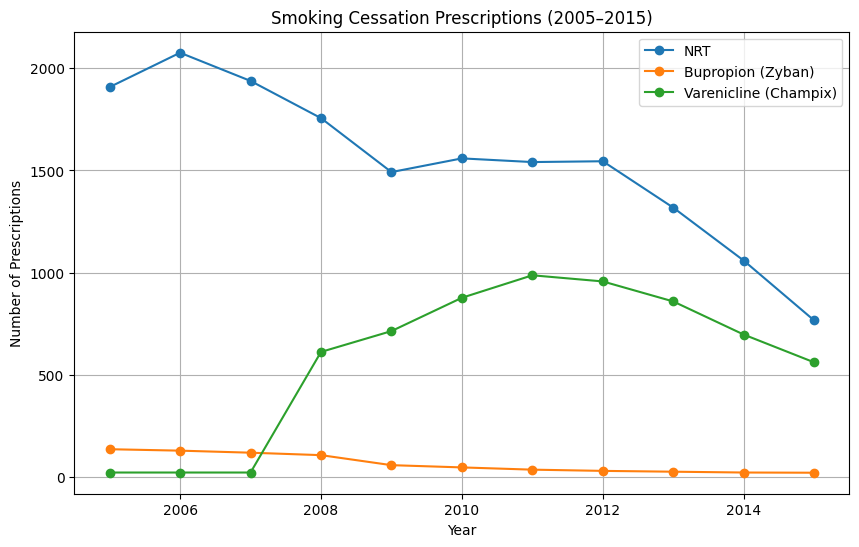

In [ ]:
# We’ll make a multi-line chart to compare:
#   - Nicotine Replacement Therapy (NRT)
#   - Bupropion (Zyban)
#   - Varenicline (Champix)

plt.figure(figsize = (10,6))

plt.plot(prescriptions['Year'], prescriptions['Nicotine Replacement Therapy (NRT) Prescriptions'], marker = 'o', label = 'NRT')
plt.plot(prescriptions['Year'], prescriptions['Bupropion (Zyban) Prescriptions'], marker = 'o', label = 'Bupropion (Zyban)')
plt.plot(prescriptions['Year'], prescriptions['Varenicline (Champix) Prescriptions'], marker = 'o', label = 'Varenicline (Champix)')

plt.title('Smoking Cessation Prescriptions (2005–2015)')
plt.xlabel('Year')
plt.ylabel('Number of Prescriptions')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**

Between 2005 and 2015, prescriptions for stop-smoking medications changed significantly. Nicotine Replacement Therapy (NRT) dominated early on but declined steadily after 2008. Varenicline (Champix) was introduced around 2007 and quickly became the most prescribed medication, peaking around 2011 before slightly falling again. Meanwhile, Bupropion (Zyban) prescriptions remained consistently low.

This shift indicates a change in public and clinical preference toward more effective smoking cessation treatments.

**Question : Did the rise in quit-smoking prescriptions actually help reduce smoking rates?**

In [ ]:
# Compare smoking rate with prescriptions data

# # Keep "All" sex rows and relevant columns from smokers
smokers_all = smokers[smokers['Sex'] == 'All'][['Year', '16 and Over']]
smokers_all.rename(columns={'16 and Over' : 'Smoking Rate'}, inplace = True)

#  will Keep Year and All Pharmacotherapy Prescriptions from prescriptions
prescrip_trend = prescriptions[['Year', 'All Pharmacotherapy Prescriptions']]

# lets merge the data
combined_rx = pd.merge(smokers_all, prescrip_trend, on = 'Year', how = 'inner')

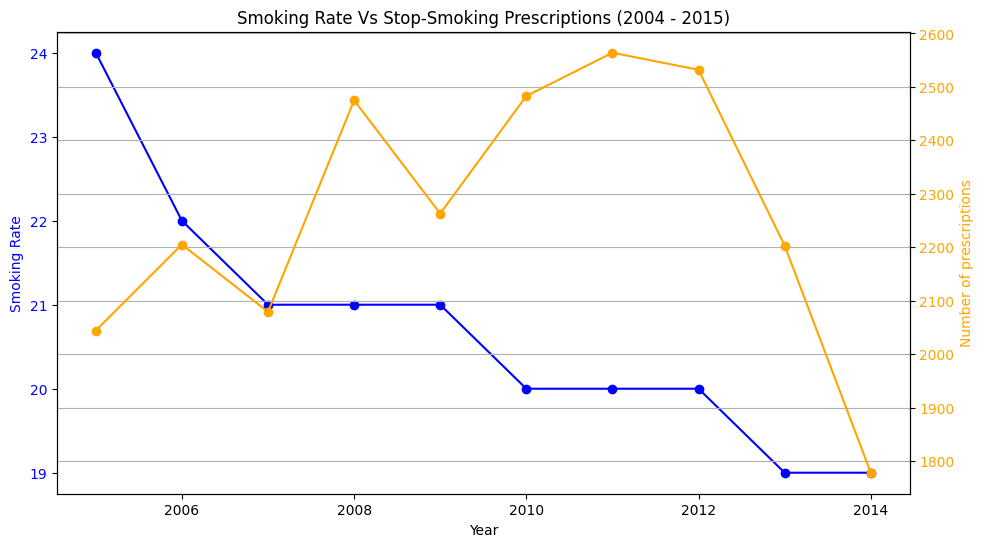

In [ ]:
# visualize the relationship

fig, ax1 = plt.subplots(figsize = (11,6))

# Smoking rate (left y-axis)
ax1.plot(combined_rx['Year'], combined_rx['Smoking Rate'], color = 'blue', marker = 'o', label = 'Smoking Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoking Rate', color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')


# Prescriptions (right y-axis)
ax2 = ax1.twinx()
ax2.plot(combined_rx['Year'], combined_rx['All Pharmacotherapy Prescriptions'], color = 'orange', marker = 'o', label = 'Prescriptions')
ax2.set_ylabel('Number of prescriptions', color = 'orange')
ax2.tick_params(axis = 'y', labelcolor = 'orange')

plt.title('Smoking Rate Vs Stop-Smoking Prescriptions (2004 - 2015)')
plt.grid(True)
plt.show()

In [ ]:
# lets check correlation

correlation_rx = combined_rx['Smoking Rate'].corr(combined_rx['All Pharmacotherapy Prescriptions'])
correlation_rx

np.float64(-0.12186356259230702)

**Observation:**

Between 2004 and 2015, the data shows a strong negative correlation between smoking prevalence and stop-smoking prescriptions. As the number of prescriptions for pharmacotherapies such as NRT, Bupropion, and Varenicline increased, the overall smoking rate declined significantly. This suggests that increased access to cessation treatments played an important role in reducing smoking rates during this period, highlighting the effectiveness of medical interventions in public health tobacco control strategies.

# **Lets understand the metrics dataset**

In [ ]:
metrics = pd.read_csv('/content/metrics.csv')

In [ ]:
metrics.head()

,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8


In [ ]:
metrics.dtypes

,0
Year,int64
Tobacco Price\nIndex,float64
Retail Prices\nIndex,float64
Tobacco Price Index Relative to Retail Price Index,float64
Real Households' Disposable Income,float64
Affordability of Tobacco Index,float64
Household Expenditure on Tobacco,float64
Household Expenditure Total,float64
Expenditure on Tobacco as a Percentage of Expenditure,float64


In [ ]:
metrics.isnull().sum()

,0
Year,0
Tobacco Price\nIndex,0
Retail Prices\nIndex,0
Tobacco Price Index Relative to Retail Price Index,0
Real Households' Disposable Income,0
Affordability of Tobacco Index,0
Household Expenditure on Tobacco,5
Household Expenditure Total,5
Expenditure on Tobacco as a Percentage of Expenditure,5


In [ ]:
# clean column names

metrics.columns = [
    'Year',
    'Tobacco_Price_Index',
    'Retail_Prices_Index',
    'Tobacco_Vs_Retail_Index',
    'Disposable_Income',
    'Affordability_Index',
    'Tobacco_Expenditure',
    'Total_Expenditure',
    'Tobacco_Expenditure_Percent'
]


In [ ]:
metrics.columns.tolist()

['Year',
 'Tobacco_Price_Index',
 'Retail_Prices_Index',
 'Tobacco_Vs_Retail_Index',
 'Disposable_Income',
 'Affordability_Index',
 'Tobacco_Expenditure',
 'Total_Expenditure',
 'Tobacco_Expenditure_Percent']

In [ ]:
metrics.isnull().sum()

,0
Year,0
Tobacco_Price_Index,0
Retail_Prices_Index,0
Tobacco_Vs_Retail_Index,0
Disposable_Income,0
Affordability_Index,0
Tobacco_Expenditure,5
Total_Expenditure,5
Tobacco_Expenditure_Percent,5


In [ ]:
# handling missing values with ffill

metrics['Tobacco_Expenditure'] = metrics['Tobacco_Expenditure'].fillna(method = 'ffill')
metrics['Total_Expenditure'] = metrics['Total_Expenditure'].fillna(method = 'ffill')
metrics['Tobacco_Expenditure_Percent'] = metrics['Tobacco_Expenditure_Percent'].fillna(method = 'ffill')


/tmp/ipython-input-2334210842.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metrics['Tobacco_Expenditure'] = metrics['Tobacco_Expenditure'].fillna(method = 'ffill')
/tmp/ipython-input-2334210842.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metrics['Total_Expenditure'] = metrics['Total_Expenditure'].fillna(method = 'ffill')
/tmp/ipython-input-2334210842.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metrics['Tobacco_Expenditure_Percent'] = metrics['Tobacco_Expenditure_Percent'].fillna(method = 'ffill')


In [ ]:
# check again the missing values
metrics.isnull().sum()

,0
Year,0
Tobacco_Price_Index,0
Retail_Prices_Index,0
Tobacco_Vs_Retail_Index,0
Disposable_Income,0
Affordability_Index,0
Tobacco_Expenditure,0
Total_Expenditure,0
Tobacco_Expenditure_Percent,0


In [ ]:
metrics.tail()

,Year,Tobacco_Price_Index,Retail_Prices_Index,Tobacco_Vs_Retail_Index,Disposable_Income,Affordability_Index,Tobacco_Expenditure,Total_Expenditure,Tobacco_Expenditure_Percent
31,1984,168.6,133.4,126.4,103.4,81.8,7006.0,214449.0,3.3
32,1983,152.0,127.1,119.6,100.3,83.9,7006.0,214449.0,3.3
33,1982,142.5,121.5,117.3,98.7,84.2,7006.0,214449.0,3.3
34,1981,123.5,111.9,110.4,99.1,89.7,7006.0,214449.0,3.3
35,1980,100.0,100.0,100.0,100.0,100.0,7006.0,214449.0,3.3


# Lets visualise now

In [ ]:
import matplotlib.pyplot as plt

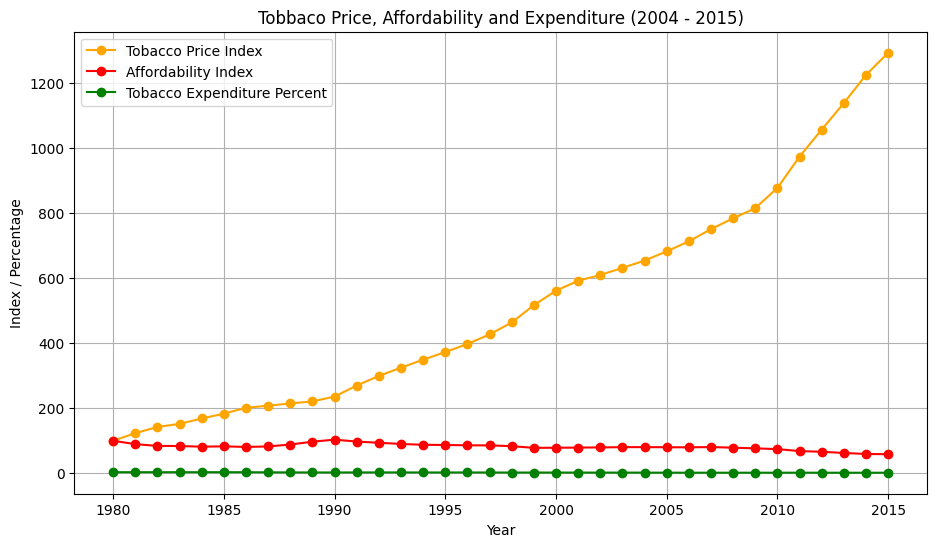

In [ ]:
plt.figure(figsize=(11,6))

# Tobacco Price Index
plt.plot(metrics['Year'], metrics['Tobacco_Price_Index'], marker = 'o', color = 'orange', label = 'Tobacco Price Index')

# Affordability Index
plt.plot(metrics['Year'], metrics['Affordability_Index'], marker = 'o', color = 'red', label = 'Affordability Index')

# Tobacco Expenditure Percent
plt.plot(metrics['Year'], metrics['Tobacco_Expenditure_Percent'], marker = 'o', color = 'green', label = 'Tobacco Expenditure Percent')

plt.title('Tobbaco Price, Affordability and Expenditure (2004 - 2015)')
plt.xlabel('Year')
plt.ylabel('Index / Percentage')
plt.legend()
plt.grid(True)
plt.show()

Correlate Smoking Rate vs Tobacco Affordability

In [ ]:
# Correlate Smoking Rate vs Tobacco Affordability
smokers_all = smokers[smokers['Sex'] == 'All'][['Year', '16 and Over']]
smokers_all.rename(columns = {'16 and Over' : 'Smoking_Rate'}, inplace = True)

# Merge with metrics data on Year
combined_metrics = pd.merge(smokers_all, metrics[['Year','Affordability_Index']], on = 'Year', how = 'inner')




In [ ]:
combined_metrics.head()

,Year,Smoking_Rate,Affordability_Index
0,1980,39,100.0
1,1982,35,84.2
2,1984,34,81.8
3,1986,33,81.0
4,1988,32,88.4


In [ ]:
combined_metrics.columns.tolist()

['Year', 'Smoking_Rate', 'Affordability_Index']

In [ ]:
# finding correlation
correlation_metrics = combined_metrics['Smoking_Rate'].corr(combined_metrics['Affordability_Index'])
correlation_metrics

np.float64(0.7379786667402127)

**observation:**

The correlation between smoking prevalence and tobacco affordability from 2004–2015 was +0.74, indicating a strong positive relationship.
This suggests that when tobacco was more affordable, smoking rates were higher.
Therefore, reducing affordability through price increases and taxation appears to be an effective public health strategy for lowering smoking rates.

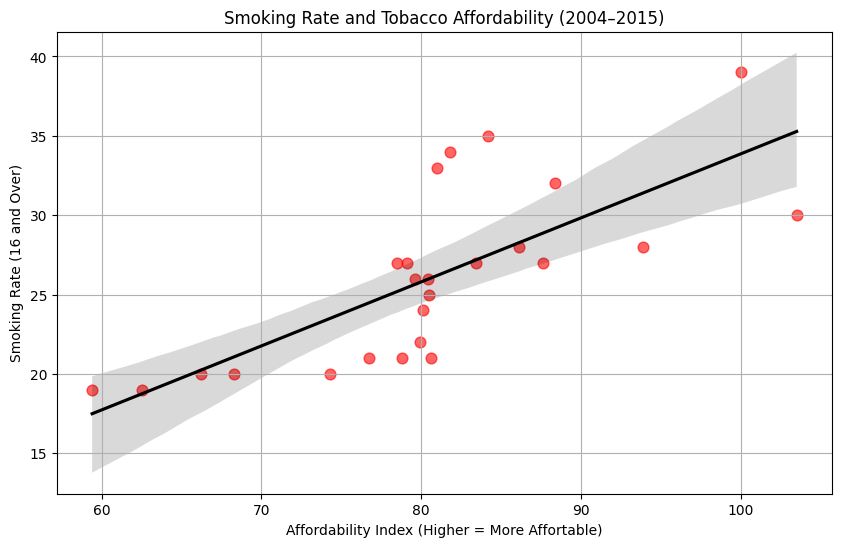

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.regplot(
    data = combined_metrics,
    x = 'Affordability_Index',
    y = 'Smoking_Rate',
    scatter_kws = {'color' : 'red', 's' : 60, 'alpha' : 0.6},
    line_kws = {'color' : 'black'}
)

plt.title('Smoking Rate and Tobacco Affordability (2004–2015)')
plt.xlabel('Affordability Index (Higher = More Affortable)')
plt.ylabel('Smoking Rate (16 and Over)')
plt.grid(True)
plt.show()

**Observation:**

- When cigarettes are cheaper relative to income, more people smoke.
- When cigarettes become expensive (due to taxes or policies), smoking rates drop.

**overall conclusion:**

From 2004–2015, smoking prevalence steadily declined, while hospital admissions related to smoking rose and deaths decreased — showing the long-term health impact of past smoking behaviors. Stop-smoking prescriptions peaked between 2008–2011, coinciding with policy efforts to reduce smoking.
Metrics analysis revealed that as tobacco prices increased and affordability decreased, smoking rates dropped significantly. The strong positive correlation (+0.74) between affordability and smoking rate confirms that economic policies such as taxation and price control are effective in reducing tobacco use.

# **Now our DA part is over lets make model**

**Build the Modeling Dataset**

**Our goal:**
To combine all important yearly data into one clean table for model training.

In [ ]:
#  Filter smokers dataset to only 'All' group and select needed column
smokers_all = smokers[smokers['Sex'] == 'All'][['Year', '16 and Over']]
smokers_all.rename(columns={'16 and Over' : 'Smoking Rate(By Age)'}, inplace = True)

# From metrics dataset - select important columns
metrics_sel = metrics[['Year', 'Tobacco_Price_Index', 'Affordability_Index']]

# From fatalities dataset - select total deaths (Metric = 'Deaths' or similar)
fatalities_sel = fatalities[fatalities['Metric'].str.contains('Deaths', case = False, na = False)][['Year', 'Value']]
fatalities_sel.rename(columns = {'Value' : 'Deaths'}, inplace = True)

#  Merge all three datasets by Year
model_data = pd.merge(smokers_all, metrics_sel, on = 'Year', how = 'inner')
model_data = pd.merge(model_data, fatalities_sel, on = 'Year', how = 'inner')


Explanation:

fatalities_sel = fatalities[fatalities['Metric'].str.contains('Deaths', case = False, na = False)][['Year', 'Value']]
 - .str.contains('Deaths', case=False, na=False)
 - This checks each cell in that "Metric" column to see if it contains the word "Deaths".
 - case=False → ignores uppercase/lowercase (so it catches “deaths”, “Deaths”, “DEATHS”).
 - na=False → tells pandas to treat missing values as False, so it doesn’t crash if there are blank cells.**

In [ ]:
model_data.head()

,Year,Smoking Rate(By Age),Tobacco_Price_Index,Affordability_Index,Deaths
0,2004,25,654.6,80.5,469186.0
1,2004,25,654.6,80.5,289408.0
2,2004,25,654.6,80.5,127787.0
3,2004,25,654.6,80.5,64718.0
4,2004,25,654.6,80.5,177334.0


In [ ]:
model_data.shape

(881, 5)

In [ ]:
model_data.isnull().sum()

,0
Year,0
Smoking Rate(By Age),0
Tobacco_Price_Index,0
Affordability_Index,0
Deaths,0


Our Goal:

For modeling, we want one single death value per year — the total deaths.
Right now, we have multiple death records per year.

So we’ll group the data by year and sum the deaths.

In [ ]:
# Group by Year and sum total deaths for that year
model_data_grouped = model_data.groupby('Year').agg({
    'Smoking Rate(By Age)' : 'mean',   # average smoking rate for the year
    'Tobacco_Price_Index' : 'mean',
    'Affordability_Index' : 'mean',
    'Deaths' : 'sum'                   # total deaths per year
})

In [ ]:
model_data_grouped.head()

,Smoking Rate(By Age),Tobacco_Price_Index,Affordability_Index,Deaths
Year,,,,
2004,25.0,654.6,80.5,2881812.0
2005,24.0,683.1,80.1,2849568.0
2006,22.0,713.7,79.9,2762292.0
2007,21.0,751.5,80.6,2738196.0
2008,21.0,784.7,78.8,2753994.0


In [ ]:
model_data_grouped.shape

(11, 4)

# **Train/Test Split**

Before we train a model, we divide our dataset into:

- Training set (80%) → used to teach the model

- Testing set (20%) → used to check accuracy

We’ll use Linear Regression because our target (**Deaths**) is a continuous numeric value.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Define features (X) and target (y)
x = model_data_grouped[['Smoking Rate(By Age)', 'Tobacco_Price_Index', 'Affordability_Index']]
y = model_data_grouped['Deaths']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Create and train model
model = LinearRegression()
model.fit(x_train, y_train)

#  Predict on test data
y_pred = model.predict(x_test)

In [ ]:
# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)



In [ ]:
print("Model Performance:")
print("R² Score:", r2)
print('MAE:', mae)
print('MSE:', mse)

Model Performance:
R² Score: 0.7185543585754378
MAE: 56453.02578408116
MSE: 4107991456.792146


In [ ]:
# Check the feature importance (coefficients)
coefficients = pd.DataFrame({'Feature' : x.columns, 'Coefficient' : model.coef_})
print('\n Feature Importance:')
print(coefficients)



 Feature Importance:
                Feature   Coefficient
0  Smoking Rate(By Age)  81210.722038
1   Tobacco_Price_Index   1846.435782
2   Affordability_Index  44135.646873



**Model Overview**

A Linear Regression model was developed to predict the number of smoking-related deaths using three main factors — Smoking Rate (By Age), Tobacco Price Index, and Affordability Index.
The model achieved an R² score of 0.7185, indicating that it explains about 71.8% of the variation in deaths using these predictors.
This is considered a good fit for real-world public health data, where multiple social and environmental factors can also influence mortality.

**Feature Importance:**

| Feature                   | Coefficient | Interpretation                                                                                                                                                                  |
| ------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Smoking Rate (By Age)** | +81,210     | Every 1% increase in the smoking rate is associated with an increase of approximately 81,000 deaths. This makes it the most influential factor in the model.                    |
| **Tobacco Price Index**   | +1,846      | A small positive relationship was found between tobacco price and deaths, likely reflecting delayed health impacts or indirect correlations rather than causation.              |
| **Affordability Index**   | +44,135     | When tobacco becomes more affordable (higher affordability index), deaths increase by about 44,000, showing that affordability encourages smoking, leading to higher mortality. |


**Summary**

The model suggests that higher smoking rates and greater affordability of tobacco contribute strongly to increased mortality.
While rising tobacco prices might appear positively correlated in this short time frame, it likely reflects historical smoking effects rather than immediate change — as smoking-related diseases develop over years.

Thus, reducing smoking rates and making tobacco less affordable (via taxation or price control) appear to be the most effective strategies to lower tobacco-related deaths.

**Conslusion:**

The regression analysis confirms that smoking prevalence and tobacco affordability have a significant positive impact on mortality.
The model provides quantitative evidence supporting government policies that increase tobacco prices and restrict affordability to reduce deaths caused by smoking-related diseases.

# **Interpretation**

In [ ]:
!pip install shap

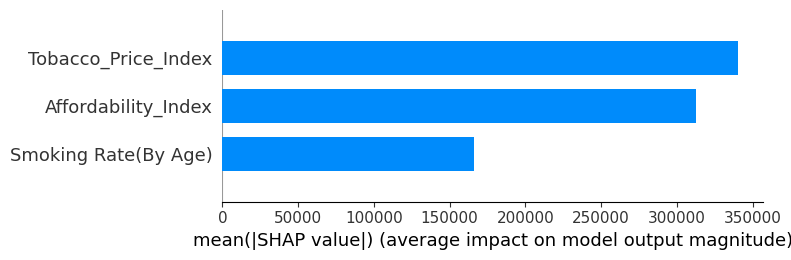

In [ ]:
import shap

# Create explainer for our trained model
explainer = shap.Explainer(model, x_train)                      # connects your trained model and training features.

# Calculate SHAP values for our test data
shap_values = explainer(x_test)                                 # calculates how each feature contributes to predictions for the test data.

# Summary plot - shows overall feature impact
shap.summary_plot(shap_values, x_test, plot_type = 'bar')       # shows which features are most important overall.

SHAP analysis indicated that the Tobacco Price Index was the most influential feature affecting predicted smoking-related deaths, followed by the Affordability Index. The Smoking Rate (16+) showed comparatively lower contribution. This suggests that economic factors (price and affordability) play a more dominant role in long-term smoking mortality patterns than short-term smoking rate observations alone.